In [1]:
import sys
sys.path.append("../../src")
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn.functional as F
import argparse
import matplotlib

from tqdm import tqdm
import glob
from PIL import Image
import os
from datetime import datetime
import time
import math
from torch.autograd import Variable
from biotorch.module.biomodule import BioModule

from ANN import *
from visualization import *

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                                            torchvision.transforms.Normalize(mean=(0.0,), std=(1.0,))])

mnist_dset_train = torchvision.datasets.MNIST('../../data', train=True, transform=transform, target_transform=None, download=True)
train_loader = torch.utils.data.DataLoader(mnist_dset_train, batch_size=20, shuffle=True, num_workers=0)

mnist_dset_test = torchvision.datasets.MNIST('../../data', train=False, transform=transform, target_transform=None, download=True)
test_loader = torch.utils.data.DataLoader(mnist_dset_test, batch_size=20, shuffle=False, num_workers=0)

In [4]:
device = "cuda"
criterion = torch.nn.MSELoss().to(device)
# criterion = torch.nn.CrossEntropyLoss()
activation = F.relu
architecture = [784, 500, 500, 10]
model = BioModule(MLP(architecture, activation = activation, final_layer_activation = None), mode = "fa").to(device)
model

Module has been converted to fa mode:

The layer configuration was:  {'type': 'fa', 'options': {'constrain_weights': False, 'gradient_clip': False, 'init': 'xavier'}}
- All the 3 <class 'torch.nn.modules.linear.Linear'> layers were converted successfully.


BioModule(
  (module): MLP(
    (linear_layers): ModuleList(
      (0): Linear(in_features=784, out_features=500, bias=True)
      (1): Linear(in_features=500, out_features=500, bias=True)
      (2): Linear(in_features=500, out_features=10, bias=True)
    )
  )
)

In [5]:
model

BioModule(
  (module): MLP(
    (linear_layers): ModuleList(
      (0): Linear(in_features=784, out_features=500, bias=True)
      (1): Linear(in_features=500, out_features=500, bias=True)
      (2): Linear(in_features=500, out_features=10, bias=True)
    )
  )
)

In [6]:
evaluateClassification(model, train_loader, "cuda")

Accuracy :	 0.13886666666666667


0.13886666666666667

In [7]:
# # specify optimizer (stochastic gradient descent) and learning rate
optimizer = torch.optim.Adam(model.parameters(),lr = 0.0005)
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9, weight_decay=0.001)

lr_decay_step = 50
lr_decay = 0.9
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=lr_decay_step, gamma=lr_decay)
trn_acc_list = []
tst_acc_list = []

n_epochs = 20
for epoch_ in range(n_epochs):
    model.train()
    for idx, (x, y) in tqdm(enumerate(train_loader)):
        x, y = Variable(x.to(device)), Variable(y.to(device))
        y_one_hot = F.one_hot(y, num_classes=10)
        optimizer.zero_grad()
        y_hat = model(x)
#         loss = criterion(y_hat,y) # Use this if criterion = torch.nn.CrossEntropyLoss()
        loss = criterion(y_hat,y_one_hot.to(torch.float32)) # Use this if criterion = torch.nn.MSELoss().to(device)
        # backward pass: compute gradient of the loss with respect to model parameters
#         model.zero_grad()
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
    
    scheduler.step()
    trn_acc = evaluateClassification(model, train_loader, device, False)
    tst_acc = evaluateClassification(model, test_loader, device, False)
    trn_acc_list.append(trn_acc)
    tst_acc_list.append(tst_acc)
    
    print("Epoch : {}, Train Accuracy : {}, Test Accuracy : {}".format(epoch_+1, trn_acc, tst_acc))

3000it [00:11, 254.40it/s]
25it [00:00, 248.57it/s]

Epoch : 1, Train Accuracy : 0.9701333333333333, Test Accuracy : 0.9676


3000it [00:12, 249.27it/s]
26it [00:00, 254.15it/s]

Epoch : 2, Train Accuracy : 0.9774166666666667, Test Accuracy : 0.9725


3000it [00:11, 253.40it/s]
25it [00:00, 249.53it/s]

Epoch : 3, Train Accuracy : 0.9832166666666666, Test Accuracy : 0.9764


3000it [00:11, 253.10it/s]
26it [00:00, 250.72it/s]

Epoch : 4, Train Accuracy : 0.98645, Test Accuracy : 0.978


3000it [00:11, 252.52it/s]
26it [00:00, 250.94it/s]

Epoch : 5, Train Accuracy : 0.9883666666666666, Test Accuracy : 0.9788


3000it [00:11, 252.45it/s]
26it [00:00, 251.29it/s]

Epoch : 6, Train Accuracy : 0.9907, Test Accuracy : 0.9806


3000it [00:11, 252.90it/s]
26it [00:00, 251.01it/s]

Epoch : 7, Train Accuracy : 0.9914666666666667, Test Accuracy : 0.9807


3000it [00:11, 253.09it/s]
26it [00:00, 257.01it/s]

Epoch : 8, Train Accuracy : 0.9928, Test Accuracy : 0.9808


3000it [00:11, 253.25it/s]
26it [00:00, 250.76it/s]

Epoch : 9, Train Accuracy : 0.9941666666666666, Test Accuracy : 0.9808


3000it [00:11, 253.17it/s]
26it [00:00, 255.13it/s]

Epoch : 10, Train Accuracy : 0.99465, Test Accuracy : 0.9816


3000it [00:11, 252.55it/s]
26it [00:00, 250.61it/s]

Epoch : 11, Train Accuracy : 0.9952666666666666, Test Accuracy : 0.9808


3000it [00:11, 252.55it/s]
26it [00:00, 256.22it/s]

Epoch : 12, Train Accuracy : 0.9956333333333334, Test Accuracy : 0.9829


3000it [00:11, 251.49it/s]
25it [00:00, 249.87it/s]

Epoch : 13, Train Accuracy : 0.9962666666666666, Test Accuracy : 0.9832


3000it [00:11, 252.48it/s]
25it [00:00, 249.90it/s]

Epoch : 14, Train Accuracy : 0.9968333333333333, Test Accuracy : 0.9833


3000it [00:11, 253.16it/s]
26it [00:00, 252.12it/s]

Epoch : 15, Train Accuracy : 0.9969166666666667, Test Accuracy : 0.9844


3000it [00:11, 253.42it/s]
13it [00:00, 123.66it/s]

Epoch : 16, Train Accuracy : 0.99725, Test Accuracy : 0.9829


3000it [00:24, 121.93it/s]
12it [00:00, 119.16it/s]

Epoch : 17, Train Accuracy : 0.99745, Test Accuracy : 0.9821


3000it [00:24, 123.15it/s]
12it [00:00, 116.30it/s]

Epoch : 18, Train Accuracy : 0.9975666666666667, Test Accuracy : 0.9826


3000it [00:24, 122.14it/s]
13it [00:00, 124.82it/s]

Epoch : 19, Train Accuracy : 0.9979166666666667, Test Accuracy : 0.9829


3000it [00:24, 120.98it/s]


Epoch : 20, Train Accuracy : 0.9980666666666667, Test Accuracy : 0.9826


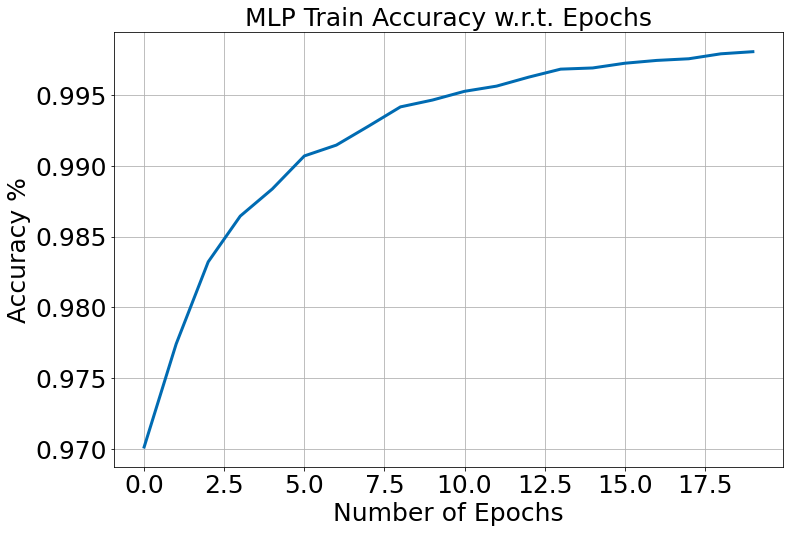

In [8]:
plot_convergence_plot(trn_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'MLP Train Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)

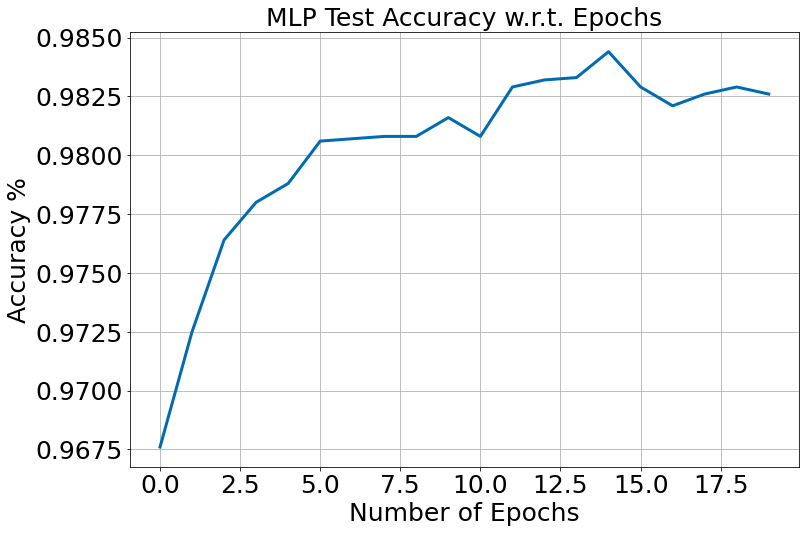

In [9]:
plot_convergence_plot(tst_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'MLP Test Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)